In [8]:
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.preprocess_cpv import process_cpv_data

In [11]:
df = pd.read_csv('../data/train.csv', encoding='utf-8')

In [ ]:
df_cpv = process_cpv_data(df, levels=None, save_csv=True, output_path=None)


Step 1: Adding CPV descriptions...
Step 2: Adding CPV hierarchy columns...
Data saved successfully to: /Users/loicdogon/code/RonanB400/decp_ml/scripts/../data/data_cpv.csv
CPV processing completed successfully!


In [16]:
df_cpv.head()

,uid,id,nature,acheteur_id,titulaire_id,montant,codeCPV,procedure,dureeMois,dateNotification,...,origineUE,origineFrance,lieuExecution_code,lieuExecution_typeCode,idAccordCadre,codeCPV_FR,codeCPV_2,codeCPV_3,codeCPV_4,codeCPV_5
0,215706722000182024TH240,2024TH240,Marché,21570672200018,42153568300013,106866.59,45111291,Appel d'offres ouvert,23.0,2024-07-19,...,0.0,0.0,57100,Code postal,NaN,Travaux d'aménagement du terrain,45000000,45100000,45110000,45111000
1,200052090000122023ELECF8,2023ELECF8,Marché,20005209000012,53791596900134,6000000.00,45231400-9,Appel d'offres ouvert,36.0,2022-11-07,...,0.0,0.0,12032,Code postal,NaN,Travaux de construction de lignes électriques,45000000,45200000,45230000,45231000
2,200058519001132023-0202,2023-0202,Marché,20005851900113,42094822600048,2200000.00,45232410-9,Appel d'offres ouvert,12.0,2023-01-01,...,NaN,NaN,78230,Code postal,2023-0202,Travaux d'assainissement,45000000,45200000,45230000,45232000
3,239740012000122023602099,2023602099,Marché,23974001200012,50067844600047,2400000.00,71351810-4,Appel d'offres ouvert,48.0,2023-02-01,...,NaN,NaN,04,Code région,2023602099,Services topographiques,71000000,71300000,71350000,71351000
4,2631001250001620241941,20241941,Marché,26310012500016,77566225700150,2268857.60,33000000-0,Procédure adaptée,36.0,2024-05-29,...,0.0,0.0,76,Code région,NaN,"Matériels médicaux, pharmaceutiques et produit...",33000000,33000000,33000000,33000000


In [28]:
df_cpv['codeCPV_2'].nunique()

69

In [29]:
df_cpv['codeCPV_2'].value_counts()

codeCPV_2
45000000    97973
71000000    34079
79000000    10067
90000000     8470
33000000     6564
            ...  
99000000        2
05000000        2
21000000        2
54000000        1
13000000        1
Name: count, Length: 69, dtype: int64

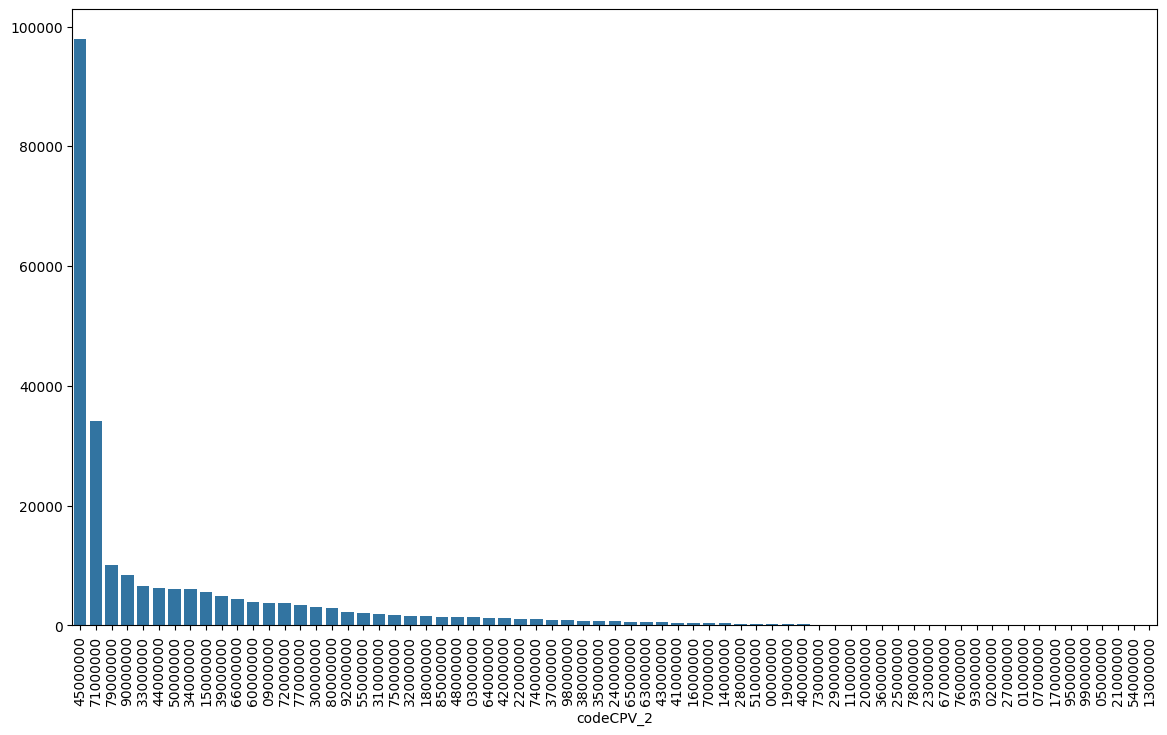

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

cpv_group_counts = df_cpv['codeCPV_2'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(x=cpv_group_counts.index, y=cpv_group_counts.values, order=cpv_group_counts.sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='codeCPV_2'>

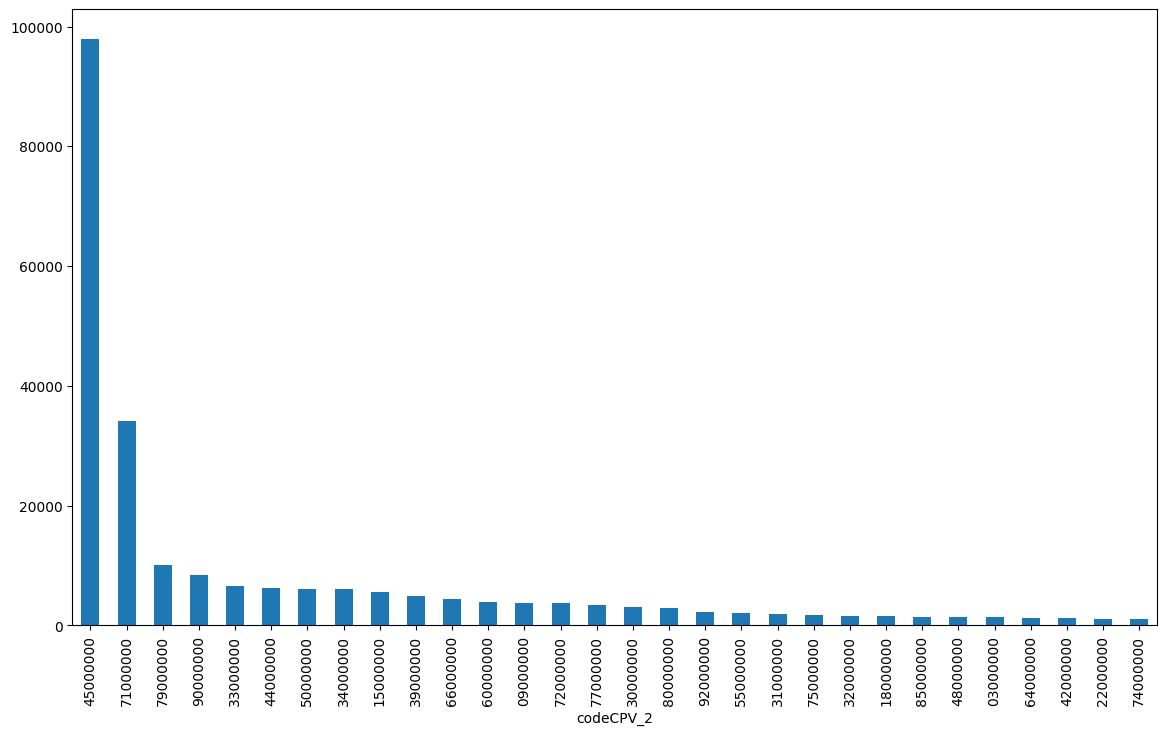

In [61]:
top_n = 30
top_groups = cpv_group_counts.nlargest(top_n)
top_groups.plot(kind='bar', figsize=(14, 8))

In [ ]:
#On considère que 1000 par catégorie
top_groups.iloc[-1]

1033

In [56]:
top_groups.iloc[3]

8470